# MLDM TASK 1

## Introduction

The dataset worked with in this project is the test data of Credit card default risk dataset from https://www.hackerearth.com/challenges/competitive/amexpert-code-lab/machine-learning/credit-card-default-risk-5-95cbc85f/, which gives companies the chance to detect if an individual will not be able to return the money lent on time.
The objective is to classify target default risk and to predict if the credit_card_default is 0 or 1. This project will employ scikit-learn library for classification using KNN and Decision Tree classification algorithms is applied.

## Content

The cleaning process of the Uncleaned student dataset includes:
- importing the libraries
- loading the dataset
- Checking for number of columns and rows
- Checking for missing values
- Feature selection

- Exploratory Data Analysis
* Checking for feature correllation using Correlation Matirx
* Pair plot
* Checking for class balance

- converting categorical features into interger codes
- Over sampling using SMOTE
- Splitting the dataset into the Training set and the Test set
- Training the model using KNN without Scaling features (Standardizing)
- cross validation of KNN
- Training the model using DECISION TREE without Scaling features (Standardizing)
- cross validation of DECISION TREE
- Scale the training data (Standardizing)
- Training the model using KNN
- Evaluating the performance of model
- Perform cross-validation
- Training the model using DECISION TREE
- Evaluating the performance of model
- Perform cross-validation
- CONCLUSION

## IMPORTING LIBRARIES

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import imblearn
import sklearn
import warnings 
warnings.filterwarnings('ignore')


## Loading my dataset

In [3]:
# Loading dataset
Data = pd.read_csv('Amex train.csv')


## Checking for number of columns and rows

In [4]:
# Checking for number of columns and rows
Data.shape

(45528, 19)

In [5]:
Data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

# Exploring my dataset

In [6]:
#summary of dataset

Data.describe()

age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0.383450          17269.727234   
min                1.000000        0.000000           2237.470000   
25%                2.000000        0.000000          19231.140000   
50%                2.000000        0.000000          29081.650000   
75%                3.000000        0.000000          40561.150000   
max               10.000000        1.000000         328112.860000   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
count  4.552800e+04           45528.00000  45520.000000   45528.000000   
mean   4.354842e+04              52.23502    782.791257       0.060710   
std    1.487847e+05              29.37691    100.619746       0.264629   
min    4.003140e+03               0.00000    500.000000       0.000000   
25%    2.397381e+04              27.00000    704.000000       0.000000   
50%    3.568804e+04              54.00000    786.000000       0.000000   
75%    5.343576e+04              78.00000    867.000000       0.000000   
max    3.112997e+07              99.00000    949.000000       2.000000   

       default_in_last_6months  credit_card_default  
count             45528.000000         45528.000000  
mean                  0.050540             0.081203  
std                   0.219059             0.273149  
min                   0.000000             0.000000  
25%                   0.000000             0.000000  
50%                   0.000000             0.000000  
75%                   0.000000             0.000000  
max                   1.000000             1.000000

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

## Checking for missing values 

In [8]:
 # Checking for missing values
Data.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

## Convert the categorical features to interger codes 

In [9]:
#Simple Regression clasifier

Data['gender'].replace('F',1, inplace=True)
Data['gender'].replace('M',0, inplace=True)
Data['gender'].replace('XNA',0, inplace=True)

Data['owns_car'].replace(['Y','N'],[1,0],inplace=True)
Data['owns_house'].replace(['Y','N'],[1,0],inplace=True)

# using LabelEncoder to transform categorical values
from sklearn.preprocessing import LabelEncoder

for col in ["occupation_type"]:
    Data[col] = LabelEncoder().fit_transform(Data[col])
    
Data


customer_id            name  age  gender  owns_car  owns_house  \
0      CST_115179        ita Bose   46       1       0.0           1   
1      CST_121920  Alper Jonathan   29       0       0.0           1   
2      CST_109330     Umesh Desai   37       0       0.0           1   
3      CST_128288             Rie   39       1       0.0           1   
4      CST_151355          McCool   46       0       1.0           1   
...           ...             ...  ...     ...       ...         ...   
45523  CST_130421           Doris   55       1       0.0           0   
45524  CST_136670         Luciana   31       1       0.0           1   
45525  CST_145435         Jessica   27       1       0.0           1   
45526  CST_130913           Tessa   32       0       1.0           0   
45527  CST_160078        Gopinath   38       0       0.0           1   

       no_of_children  net_yearly_income  no_of_days_employed  \
0                 0.0          107934.04                612.0   
1                 0.0          109862.62               2771.0   
2                 0.0          230153.17                204.0   
3                 0.0          122325.82              11941.0   
4                 0.0          387286.00               1459.0   
...               ...                ...                  ...   
45523             2.0           96207.57                117.0   
45524             0.0          383476.74                966.0   
45525             0.0          260052.18               1420.0   
45526             0.0          157363.04               2457.0   
45527             1.0          316896.28               1210.0   

       occupation_type  total_family_members  migrant_worker  \
0                   17                   1.0             1.0   
1                    8                   2.0             0.0   
2                    8                   2.0             0.0   
3                    3                   2.0             0.0   
4                    3                   1.0             0.0   
...                ...                   ...             ...   
45523               17                   4.0             0.0   
45524                0                   2.0             1.0   
45525                3                   2.0             0.0   
45526                8                   2.0             0.0   
45527               17                   3.0             0.0   

       yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0                  33070.28      18690.93                    73         544.0   
1                  15329.53      37745.19                    52         857.0   
2                  48416.60      41598.36                    43         650.0   
3                  22574.36      32627.76                    20         754.0   
4                  38282.95      52950.64                    75         927.0   
...                     ...           ...                   ...           ...   
45523              11229.54      29663.83                    82         907.0   
45524              43369.91     139947.16                    32         679.0   
45525              22707.51      83961.83                    46         727.0   
45526              20150.10      25538.72                    92         805.0   
45527              34603.78      36630.76                    26         682.0   

       prev_defaults  default_in_last_6months  credit_card_default  
0                  2                        1                    1  
1                  0                        0                    0  
2                  0                        0                    0  
3                  0                        0                    0  
4                  0                        0                    0  
...              ...                      ...                  ...  
45523              0                        0                    0  
45524              0                        0                    0

## ***Dealing with missing values

As owns_cars,no_of_children,no_of_days_employed, total_family_members, migrant_worker,yearly_debt_payments, and credit_score columns are numerical and contain null values, I filled missing values in each column which contained missing value with the mode or median of that column. The following code uses “mean” to getthe null values filled. It replace the null value of Age and Mileage columns (NaN)by mean value of those columns

In [10]:

Data.owns_car.fillna(Data.owns_car.mode().values[0],inplace=True)
Data.no_of_children.fillna(np.median(Data.no_of_children.dropna()), inplace=True)
Data.no_of_days_employed.fillna(np.median(Data.no_of_days_employed.dropna()), inplace=True)
Data.total_family_members.fillna(np.median(Data.total_family_members.dropna()), inplace=True)
Data.migrant_worker.fillna(Data.migrant_worker.mode().values[0],inplace=True)
Data.yearly_debt_payments.fillna(np.median(Data.yearly_debt_payments.dropna()), inplace=True)
Data.credit_score.fillna(np.median(Data.credit_score.dropna()), inplace=True)


Data.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

# Feature Selection
The filter method will be used to remove the name and customer_id column beacause it is not relevant to the target output.

In [11]:
# Filter Method Feature Selection
Data = Data.drop (columns=(['customer_id','name']))
Data

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0       46       1       0.0           1             0.0          107934.04   
1       29       0       0.0           1             0.0          109862.62   
2       37       0       0.0           1             0.0          230153.17   
3       39       1       0.0           1             0.0          122325.82   
4       46       0       1.0           1             0.0          387286.00   
...    ...     ...       ...         ...             ...                ...   
45523   55       1       0.0           0             2.0           96207.57   
45524   31       1       0.0           1             0.0          383476.74   
45525   27       1       0.0           1             0.0          260052.18   
45526   32       0       1.0           0             0.0          157363.04   
45527   38       0       0.0           1             1.0          316896.28   

       no_of_days_employed  occupation_type  total_family_members  \
0                    612.0               17                   1.0   
1                   2771.0                8                   2.0   
2                    204.0                8                   2.0   
3                  11941.0                3                   2.0   
4                   1459.0                3                   1.0   
...                    ...              ...                   ...   
45523                117.0               17                   4.0   
45524                966.0                0                   2.0   
45525               1420.0                3                   2.0   
45526               2457.0                8                   2.0   
45527               1210.0               17                   3.0   

       migrant_worker  yearly_debt_payments  credit_limit  \
0                 1.0              33070.28      18690.93   
1                 0.0              15329.53      37745.19   
2                 0.0              48416.60      41598.36   
3                 0.0              22574.36      32627.76   
4                 0.0              38282.95      52950.64   
...               ...                   ...           ...   
45523             0.0              11229.54      29663.83   
45524             1.0              43369.91     139947.16   
45525             0.0              22707.51      83961.83   
45526             0.0              20150.10      25538.72   
45527             0.0              34603.78      36630.76   

       credit_limit_used(%)  credit_score  prev_defaults  \
0                        73         544.0              2   
1                        52         857.0              0   
2                        43         650.0              0   
3                        20         754.0              0   
4                        75         927.0              0   
...                     ...           ...            ...   
45523                    82         907.0              0   
45524                    32         679.0              0   
45525                    46         727.0              0   
45526                    92         805.0              0   
45527                    26         682.0              0   

       default_in_last_6months  credit_card_default  
0                            1                    1  
1                            0                    0  
2                            0                    0  
3                            0                    0  
4                            0                    0  
...                        ...                  ...  
45523                        0                    0  
45524                        0                    0  
45525                        0                    0  
45526                        0                    0  
45527                        0                    0  

[45528 rows x 17 columns]

# Exploratory Data Analysis.

## Correlation Matrix

<Axes: >

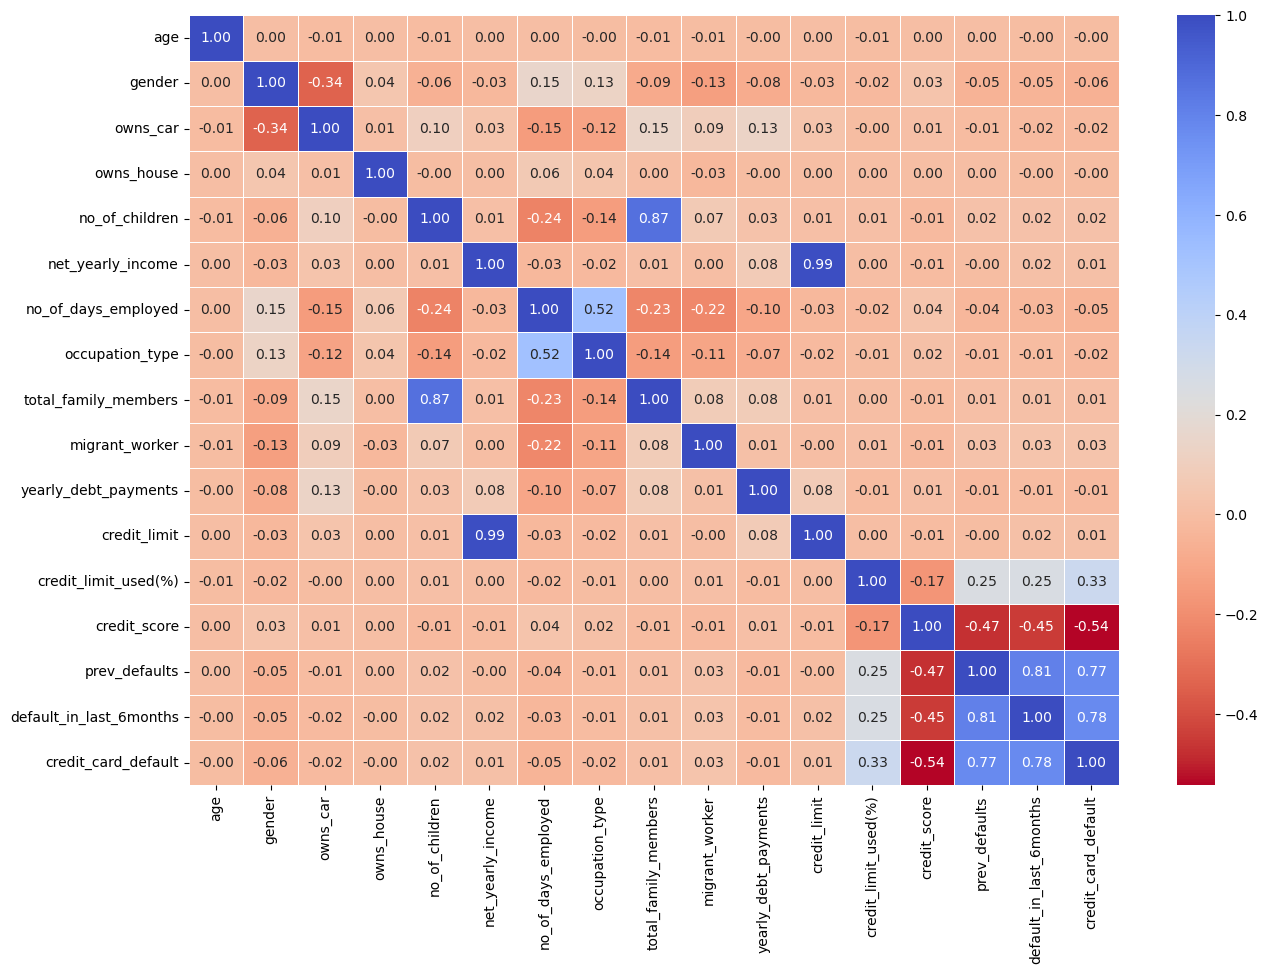

In [12]:
#dataplot = sb.heatmap(df3.corr(), cmap="YlGnBu", annot=True)

fig, ax = plt.subplots(figsize=(15,10))     # Sample figsize in inches


from matplotlib import cm
initial_cmap = cm.get_cmap("coolwarm")
reversed_cmap=initial_cmap.reversed()

sns.heatmap(Data.corr(), annot=True, linewidths=.5, fmt='.2f',ax=ax,cmap=reversed_cmap)

# Pair wise relationships between numerical features

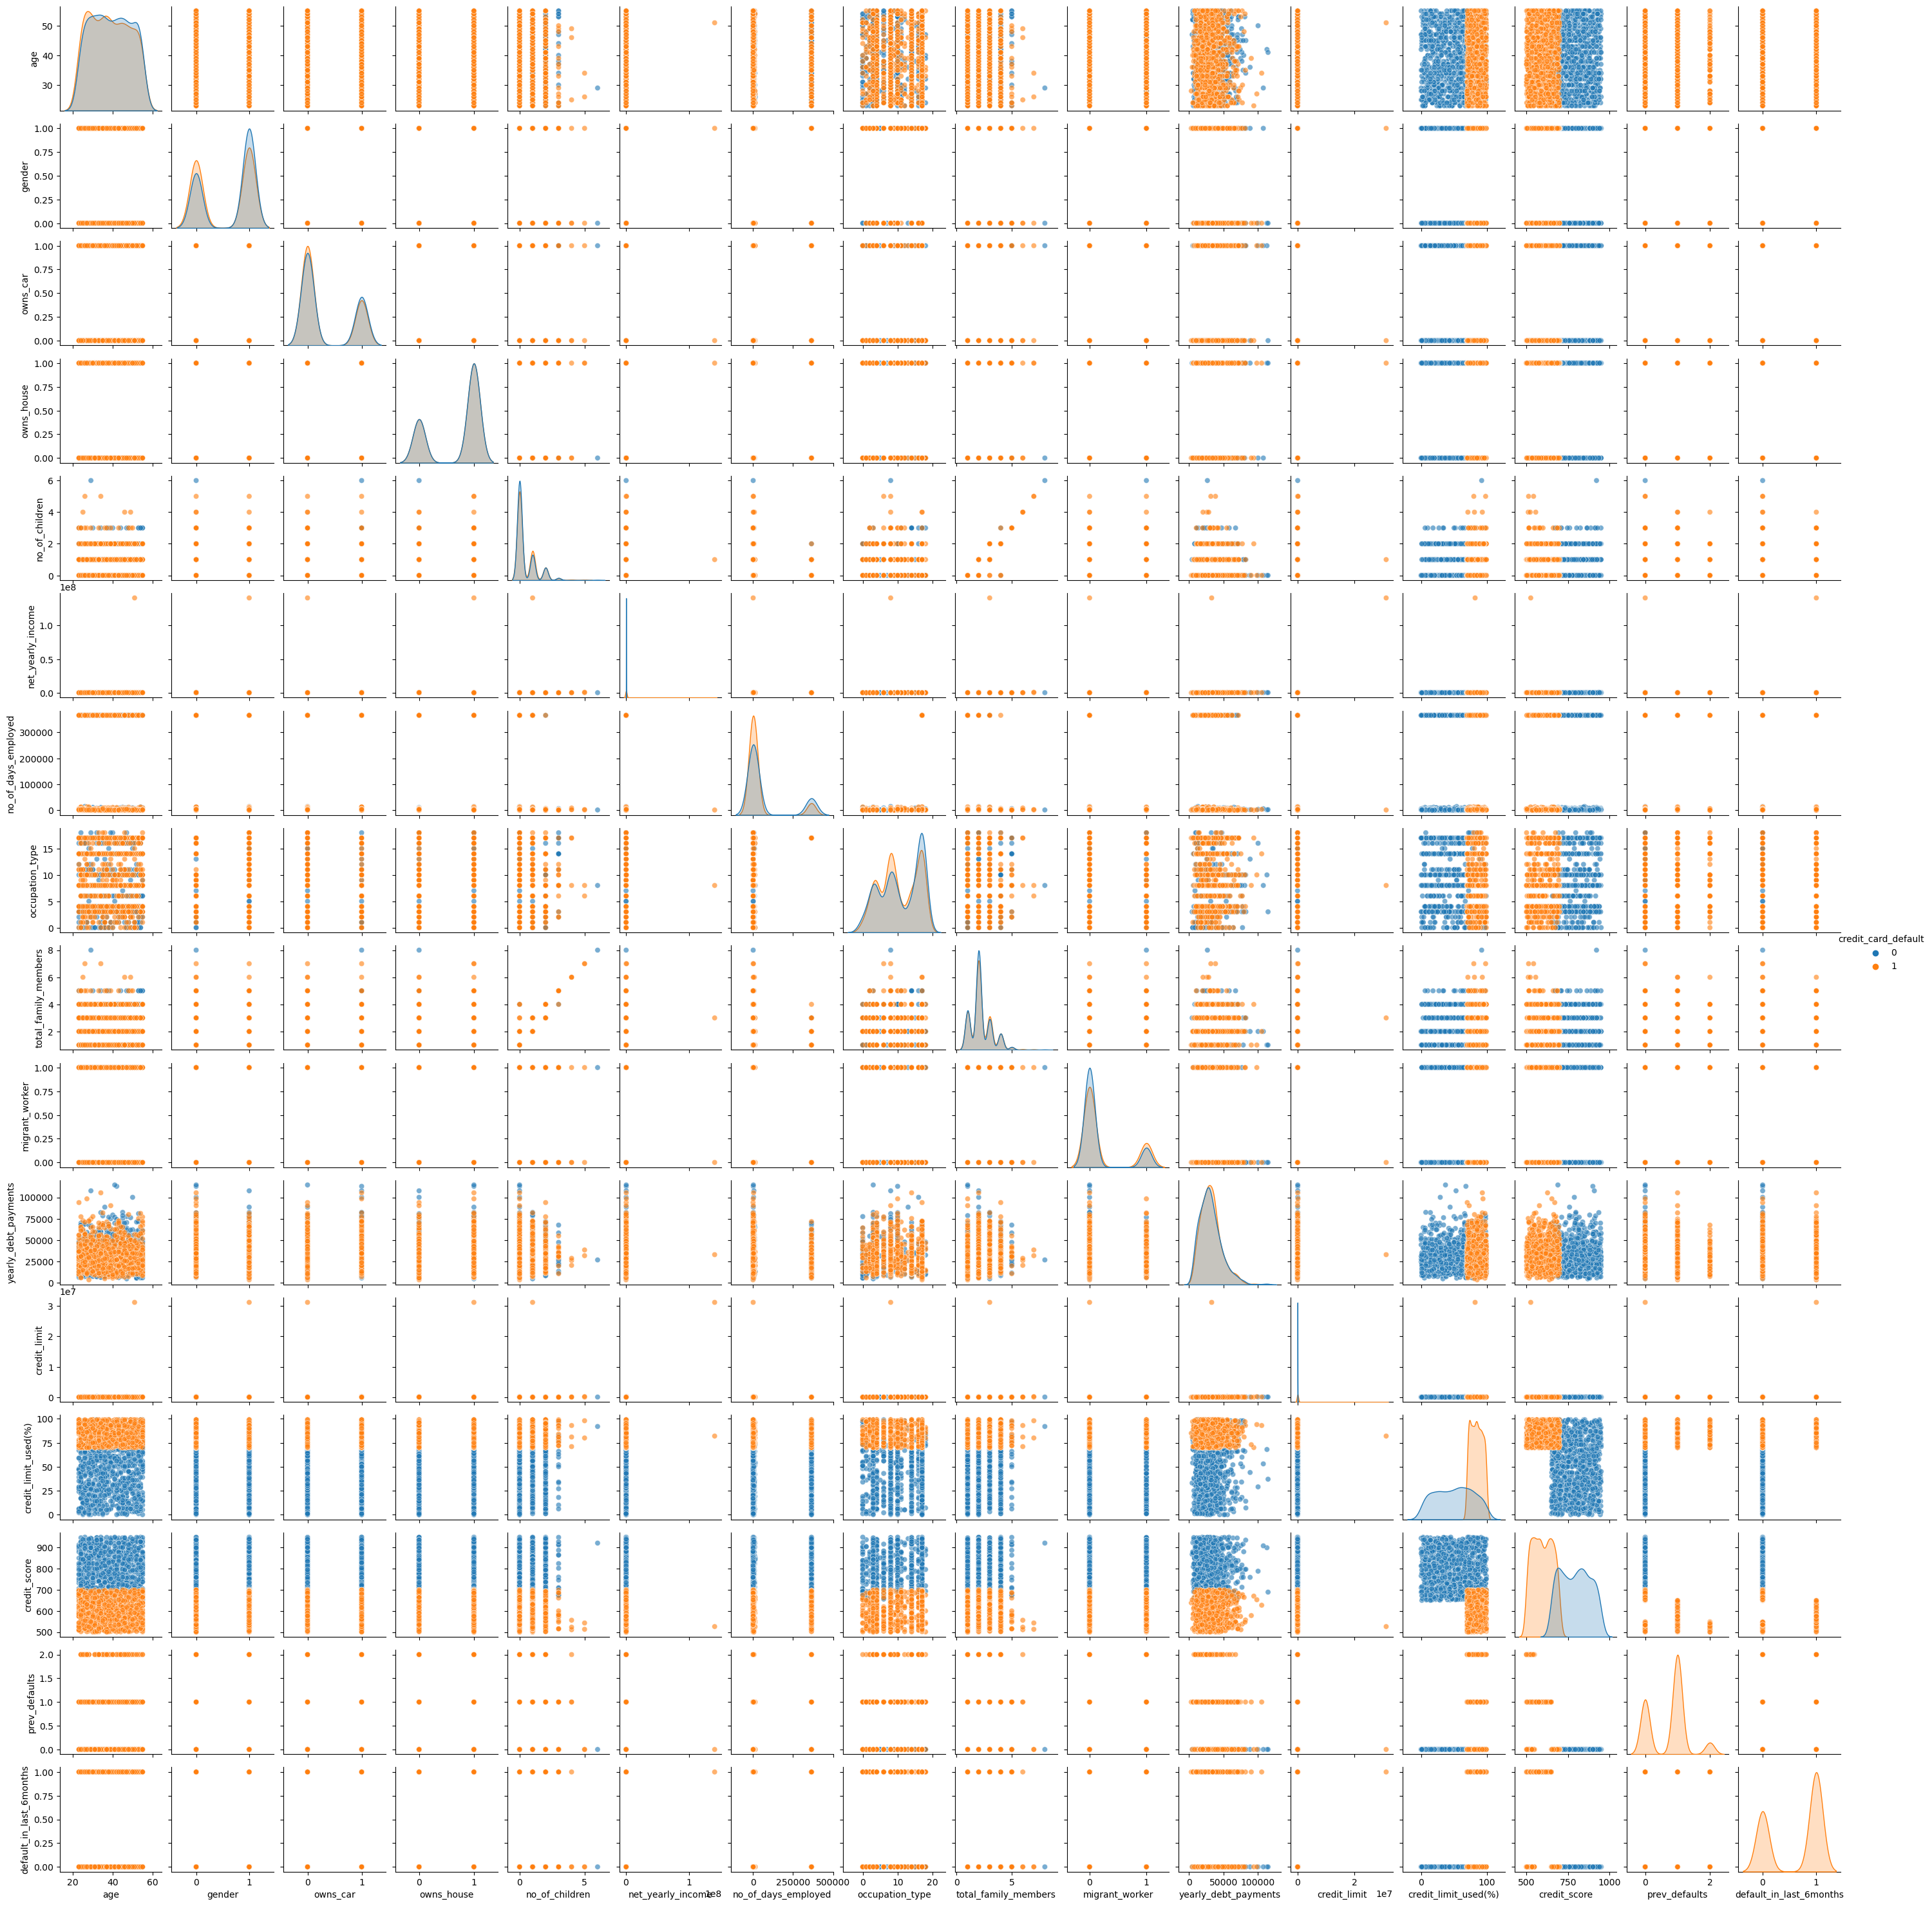

In [13]:
df_sample = Data.groupby('credit_card_default', group_keys=False).apply(lambda x: x.sample(1000))

g=sns.pairplot(df_sample, hue="credit_card_default",plot_kws={'alpha':0.6})
g.fig.set_size_inches(30,30)

In [14]:
Data['credit_card_default'].value_counts()

credit_card_default
0    41831
1     3697
Name: count, dtype: int64

In [15]:
# Checking for class imbalance 
import plotly.express as px
ClassData = Data['credit_card_default']
fig = px.pie(ClassData, values= ClassData.value_counts().values, names= ClassData.value_counts().index)
fig.update_traces(hoverinfo='label', textinfo='value+percent')
fig.show()

<Axes: xlabel='credit_card_default', ylabel='count'>

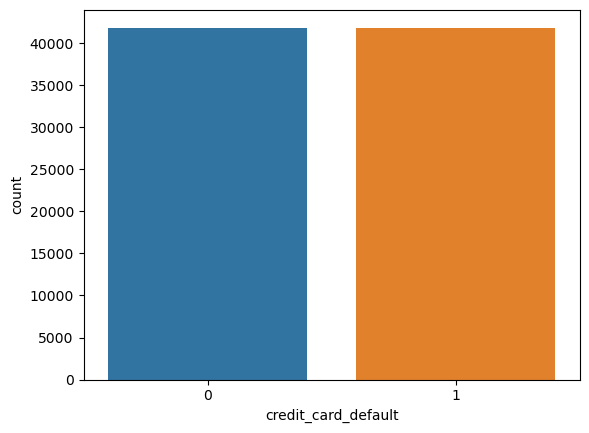

In [20]:
from imblearn.over_sampling import SMOTE

target=Data["credit_card_default"]
train_data=Data.drop(["credit_card_default"],axis=1)

features, labels = SMOTE().fit_resample(Data.drop(["credit_card_default"],axis=1), Data.credit_card_default)


sns.countplot(x = labels )

In [35]:
# Checking for class imbalance with pie chart
import plotly.express as px
ClassData = labels 
fig = px.pie(ClassData, values= ClassData.value_counts().values, names= ClassData.value_counts().index)
fig.update_traces(hoverinfo='label', textinfo='value+percent')
fig.show()

## More Imports 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


### Split the data into training and testing sets

In [21]:
X = features
Y = labels
X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size = 0.2,random_state=42)

# Training the model using KNN without standardising the features

In [22]:
# Create and train the KNN model
k = 3  # You can adjust the number of neighbors as needed
model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

### Make predictions on the test set

In [23]:
# Predict using the test set
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 0 1]


### Evaluate the model

In [24]:
# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8413912627741589
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      8319
           1       0.78      0.96      0.86      8414

    accuracy                           0.84     16733
   macro avg       0.86      0.84      0.84     16733
weighted avg       0.86      0.84      0.84     16733



In [25]:
# Getting the Confustion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]


print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[6024 2295]
 [ 359 8055]]


### using seaborn heatmap to visualise the confusion matrix

<function matplotlib.pyplot.show(close=None, block=None)>

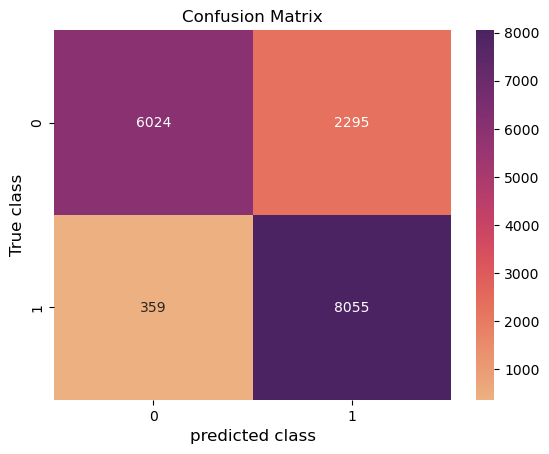

In [26]:
ax = sns.heatmap(cm, cmap='flare', annot= True, fmt= 'd')
plt.xlabel('predicted class',fontsize=12)
plt.ylabel('True class',fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show

# K-Nearest Neighbors (KNN) model with cross-validation

In [31]:
# K-Nearest Neighbors (KNN) model with cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# K-Nearest Neighbors (KNN) model with cross-validation
knn_model = KNeighborsClassifier()
knn_pipeline = make_pipeline(StandardScaler(), knn_model)
knn_cv_scores = cross_val_score(knn_pipeline, X, Y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("Mean Accuracy:", knn_cv_scores.mean())


KNN Cross-Validation Scores: [0.96378414 0.97466085 0.97669137 0.97268707 0.972448  ]
Mean Accuracy: 0.9720542858595632


# Training the model using Decision Tree algorithm without standardising

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Make predictions on the test set

In [33]:
decision_tree_predictions = decision_tree_model.predict(X_test)
print(decision_tree_predictions)

[1 1 1 ... 1 0 1]


## Evaluate the model

In [34]:
def evaluate_model(model_name, predictions):
    accuracy = accuracy_score(Y_test, predictions)
    report = classification_report(Y_test, predictions)
    print(f"** {model_name} **")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
evaluate_model("Decision Tree", decision_tree_predictions)
   

** Decision Tree **
Accuracy: 0.9826689774696707
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8319
           1       0.98      0.98      0.98      8414

    accuracy                           0.98     16733
   macro avg       0.98      0.98      0.98     16733
weighted avg       0.98      0.98      0.98     16733



## using seaborn heatmap to visualise the confusion matrix

In [35]:
# getting the confusion matrix
confusion = metrics.confusion_matrix(Y_test, decision_tree_predictions)

# Extract TP, TN, FP, FN from the confusion matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[8158  161]
 [ 129 8285]]


<function matplotlib.pyplot.show(close=None, block=None)>

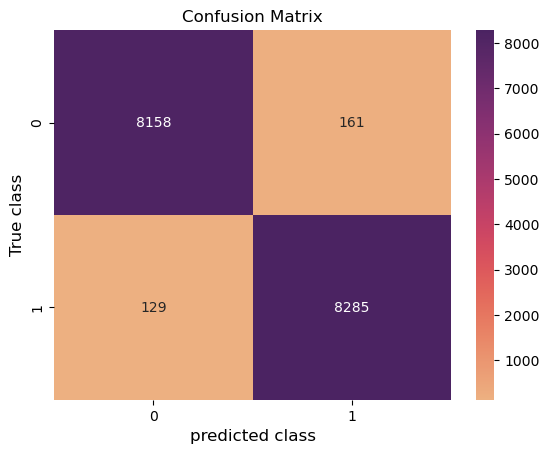

In [36]:
ax = sns.heatmap(confusion, cmap='flare', annot= True, fmt= 'd')
plt.xlabel('predicted class',fontsize=12)
plt.ylabel('True class',fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show

# Decision Tree model with cross-validation

In [37]:
# Perform cross-validation for Decision Tree model
dt_model = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model, X, Y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean Accuracy:", dt_cv_scores.mean())



Decision Tree Cross-Validation Scores: [0.95792745 0.9872109  0.98738943 0.98529763 0.98440115]
Mean Accuracy: 0.9804453127139687


# Standardizing before training the model using KNN

### Scaling features

In [38]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Create and train the KNN model
k = 3  # You can adjust the number of neighbors as needed
model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Predict using the test set
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 0 1]


### Model Evaluation

In [41]:
# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.9751987091376322
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8319
           1       0.96      0.99      0.98      8414

    accuracy                           0.98     16733
   macro avg       0.98      0.98      0.98     16733
weighted avg       0.98      0.98      0.98     16733



### using seaborn heatmap to visualise the confusion matrix

In [42]:
# getting the confusion matrix
confusion = metrics.confusion_matrix(Y_test, decision_tree_predictions)

# Extract TP, TN, FP, FN from the confusion matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[8158  161]
 [ 129 8285]]


<function matplotlib.pyplot.show(close=None, block=None)>

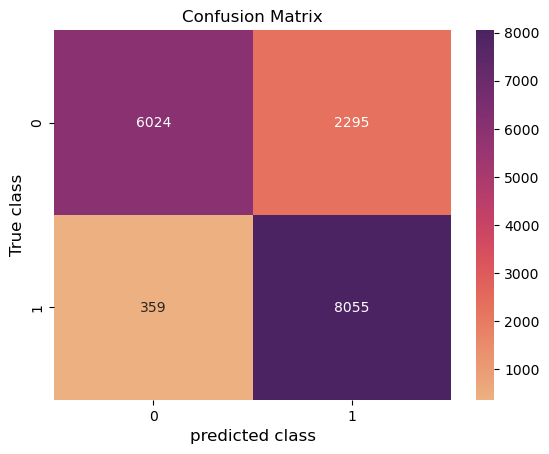

In [43]:
ax = sns.heatmap(cm, cmap='flare', annot= True, fmt= 'd')
plt.xlabel('predicted class',fontsize=12)
plt.ylabel('True class',fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show

# K-Nearest Neighbors (KNN) model with cross-validation

In [45]:
# K-Nearest Neighbors (KNN) model with cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# K-Nearest Neighbors (KNN) model with cross-validation
knn_model = KNeighborsClassifier()
knn_pipeline = make_pipeline(StandardScaler(), knn_model)
knn_cv_scores = cross_val_score(knn_pipeline, X, Y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("Mean Accuracy:", knn_cv_scores.mean())

KNN Cross-Validation Scores: [0.96378414 0.97466085 0.97669137 0.97268707 0.972448  ]
Mean Accuracy: 0.9720542858595632


# Standardizing before training the model using Decision Tree algorithm

In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Make predictions on the test set

In [47]:
decision_tree_predictions = decision_tree_model.predict(X_test)
print(decision_tree_predictions)

[1 1 1 ... 1 0 1]


### Evaluate the model

In [48]:
def evaluate_model(model_name, predictions):
    accuracy = accuracy_score(Y_test, predictions)
    report = classification_report(Y_test, predictions)
    print(f"** {model_name} **")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
evaluate_model("Decision Tree", decision_tree_predictions)
   

** Decision Tree **
Accuracy: 0.9826689774696707
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8319
           1       0.98      0.98      0.98      8414

    accuracy                           0.98     16733
   macro avg       0.98      0.98      0.98     16733
weighted avg       0.98      0.98      0.98     16733



### confusion matrix

In [49]:
# getting the confusion matrix
confusion = metrics.confusion_matrix(Y_test, decision_tree_predictions)

# Extract TP, TN, FP, FN from the confusion matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[8158  161]
 [ 129 8285]]


## using seaborn heatmap to visualise the confusion matrix

<function matplotlib.pyplot.show(close=None, block=None)>

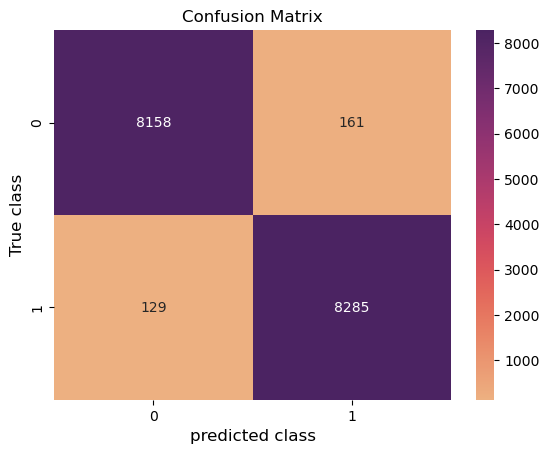

In [50]:
ax = sns.heatmap(confusion, cmap='flare', annot= True, fmt= 'd')
plt.xlabel('predicted class',fontsize=12)
plt.ylabel('True class',fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show

# Decision Tree model with cross-validation

In [51]:
# Perform cross-validation for Decision Tree model
dt_model = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model, X, Y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean Accuracy:", dt_cv_scores.mean())


Decision Tree Cross-Validation Scores: [0.95744935 0.9867328  0.9870906  0.98559646 0.98469998]
Mean Accuracy: 0.9803138395630526


# Conclusion

Given that both models have achieved such high levels of accuracy and other performance metrics, it is challenging to distinguish between them based solely on their  results. An advanced evaluation techniques, cross-validation techniques to be precised, was futher used assess the models' robustness and based on the evaluation The Decision Tree model exhibits excellent accuracy but may be overfitting the training data, as evidenced by the perfect accuracy across all folds.
The KNN model provides good but slightly less consistent accuracy, with a mean accuracy of approximately 0.841 before standardization and 0.975 afer standardization. However, I recommend that both algorithms would be appropriate for future deployment.